# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# read the data
# do update this if needed at the pd.read_csv('')
df = pd.read_csv("/content/drive/MyDrive/MIT/Project Assessment : Foundations of Data Science/foodhub_order.csv")
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
rows, columns = df.shape
print("Number of rows: " + str(rows))
print("Number of columns: " + str(columns))

Number of rows: 1898
Number of columns: 9


#### Observations:
Indeed there are 9 columns, and also with **df.shape** we can see there's 1898 rows.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:   
The datatypes of order_id is **int64**, customer_id is **int64**, restaurant_name is **object**, cuisine_type is **object**, cost_of_the_order is **float64**, day_of_the_week is **object**, rating is **object**, food_preparation_time is **int64**, delivery_time is **int64** respectively.  


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
print(df.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
There are no missing values in the data. **df.isnull()** was used to check for any empty value, while **.sum()** is used to count the missing values. The checking was checking for true or false so the the counting checks the number of true values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
print(df['food_preparation_time'].describe())


count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64


#### Observations:
**Minimum prep time:** 20.0

**Average prep time:** 27.371970

**Maximum prep time:** 35.0



**df[<column name>].describe()** calls for an analaysis of the data. I could also have done **(df['food_preparation_time'].<min/mean/max>()**

### **Question 5:** How many orders are not rated?

In [ ]:
print(df['rating'].eq('Not given').sum())

736


#### Observations:
**736** ratings are not given, I've used **df[<column name>.eq(<Value I'm searching for>**) to look for the 'Not given' and **.sum()** to count.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [ ]:
#order_id is a unique key so don't need distribution

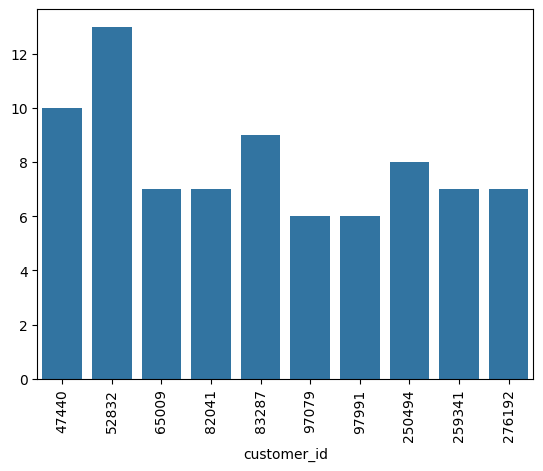

In [ ]:
# Get the top 10 customers by number of orders
top_customers = df["customer_id"].value_counts().head(10)

# Create a bar chart of the top 10 customers
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.xticks(rotation=90)
plt.show()

This bar chart will only show the top 10 customers by number of orders, which will make it easier to see which customers order the most frequently.

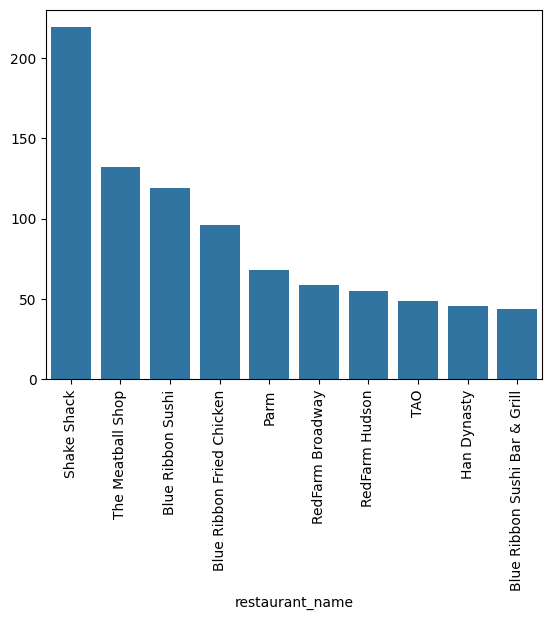

In [ ]:
# Get the top 10 restaurants by number of orders
top_restaurants = df["restaurant_name"].value_counts().head(10)

# Create a bar chart of the top 10 restaurants
sns.barplot(x=top_restaurants.index, y=top_restaurants.values)
plt.xticks(rotation=90)
plt.show()

This bar chart will only show the top 10 restaurants by number of orders, which will make it easier to see which restaurants are the most popular with customers.

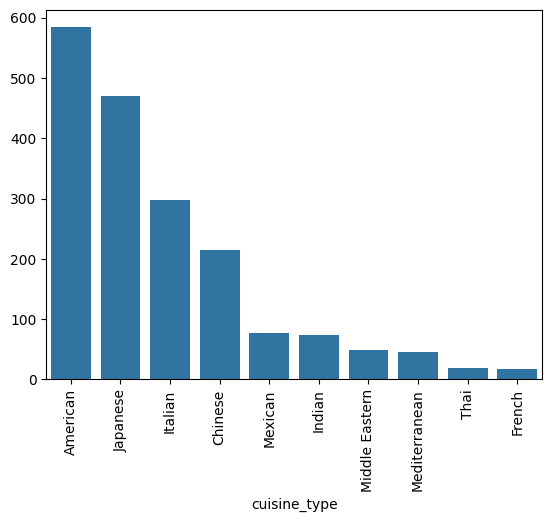

In [ ]:

# Get the top 10 cuisine types by number of orders
top_cuisines = df["cuisine_type"].value_counts().head(10)

# Create a bar chart of the top 10 cuisine types
sns.barplot(x=top_cuisines.index, y=top_cuisines.values)
plt.xticks(rotation=90)
plt.show()


This bar chart will only show the top 10 cuisine types by number of orders, which will make it easier to see which cuisine types are the most popular with customers.

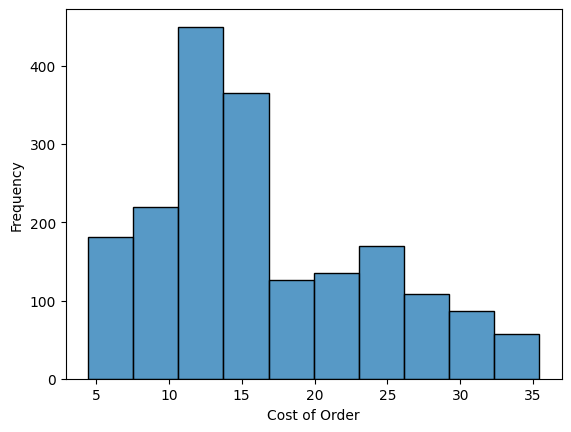

In [ ]:
# Create a histogram of order costs
sns.histplot(data=df, x="cost_of_the_order", bins=10)
plt.xlabel("Cost of Order")
plt.ylabel("Frequency")
plt.show()


This histogram will show the number of orders on the y-axis and the cost of the orders on the x-axis. This can help to identify any orders that are particularly expensive or inexpensive, and can also help to identify any potential data entry errors.

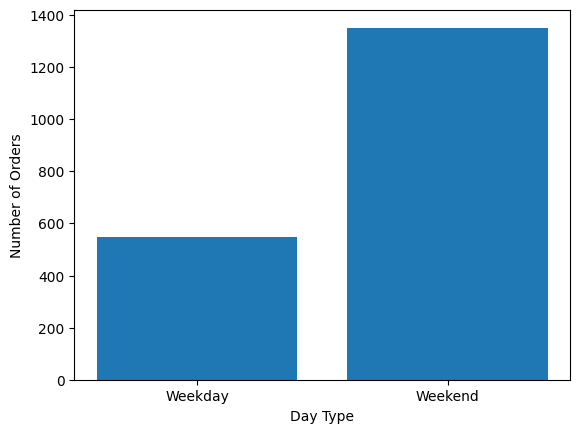

In [ ]:
# Create a dictionary to store the counts of weekdays and weekends
day_counts = {
    "Weekday": df[df["day_of_the_week"] == "Weekday"].shape[0],
    "Weekend": df[df["day_of_the_week"] == "Weekend"].shape[0],}

# Create a bar chart
plt.bar(list(day_counts.keys()), list(day_counts.values()))
plt.xlabel("Day Type")
plt.ylabel("Number of Orders")
plt.show()

This code will create a bar chart that shows the number of orders for weekdays and weekends, based on the provided data.

<Axes: xlabel='rating', ylabel='Count'>

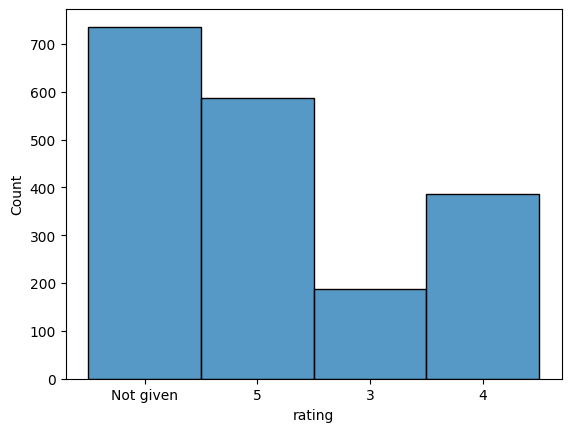

In [ ]:
sns.histplot(df, x='rating')


This histogram shows an overall view of the rating counts given in the dataset.

<Axes: xlabel='food_preparation_time', ylabel='Count'>

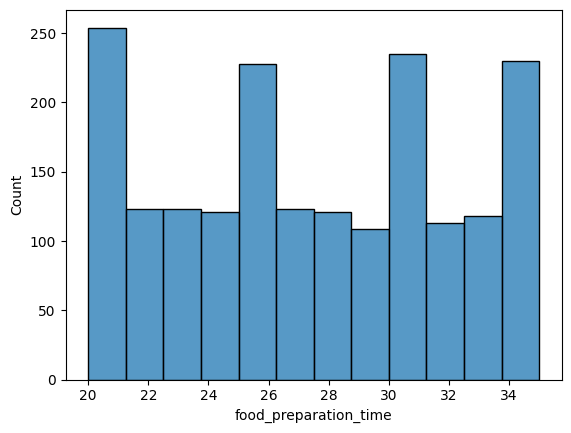

In [ ]:
sns.histplot(df, x='food_preparation_time')


This is to show the overall frequency of the food preparation times.

<Axes: xlabel='delivery_time', ylabel='Count'>

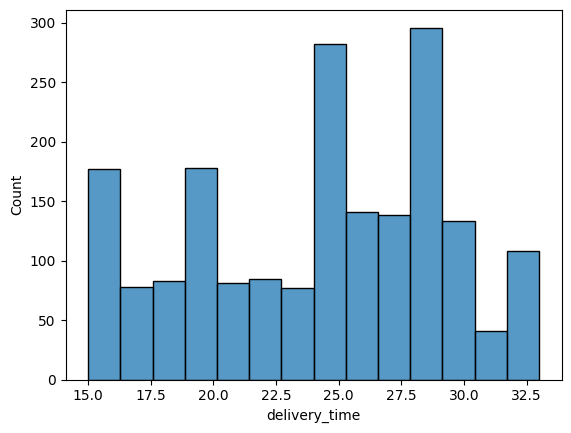

In [ ]:
sns.histplot(df, x='delivery_time')

This is to show the overall frequency of the delivery times.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
restaurant_orders = df.groupby("restaurant_name").size().sort_values(ascending=False)
print(restaurant_orders.head(5))

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
dtype: int64


#### Observations:
The top 5 restaurants with orders received are **Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm**


Here I use **df.groupby** to create a new column and **.size()** to count the orders. **.sort_values(ascending=False)** is to descend the order and **.head(5)** to print the results of the top 5.

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
weekend_orders = df[df["day_of_the_week"].isin(["Weekend"])]
#print(weekend_orders)

cuisine_orders = weekend_orders.groupby("cuisine_type").size().sort_values(ascending=False)

print(cuisine_orders.index[0])


American


#### Observations:

American cuisine was the most popular on weekends.


I used df twice here to do boolean indexing, one is to select, while the other to check for values "Weekend", returning me an entire new dataframe with my conditions.

Then I use **df.groupby** to create a new column and **.size()** to count the  cuisine orders once again. **.sort_values(ascending=False)** is to descend the order once again and .**head(5)** to print the results of the top 5 once again.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
total_orders = df.shape[0]


expensive_orders = df[df["cost_of_the_order"] > 20].shape[0]


print((expensive_orders / total_orders) * 100)

print(f"{((expensive_orders / total_orders) * 100):.2f}%")

29.24130663856691
29.24%


#### Observations:
**29.24%** of orders cost most than 20 dollars.

I calculated the total orders just by using **df.shape[0]** to get the number of rows. Then sorted it out with **> 20** and created a new dataframe again to divide from the total before times a 100 to get percentage.

### **Question 10**: What is the mean order delivery time?

In [ ]:
print(df["delivery_time"].mean())

print(f"{(df['delivery_time'].mean()):.2f}")

24.161749209694417
24.16


#### Observations:
Mean delivery time is **24.16 units** as the measurement has not been identified.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
print(df.groupby("customer_id").size().sort_values(ascending=False).head(3))

customer_id
52832    13
47440    10
83287     9
dtype: int64


#### Observations:
The top 3 most frequent customers are customer **52832 with 13 orders**, **47440 with 10 orders**, and **83287 with 9 orders.**

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

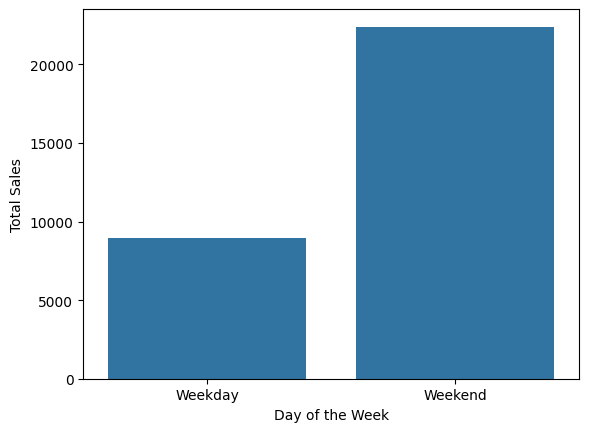

In [ ]:
sales_by_day = df.groupby("day_of_the_week")["cost_of_the_order"].sum().reset_index()

# Create a bar chart of sales by day of the week
sns.barplot(x="day_of_the_week", y="cost_of_the_order", data=sales_by_day)
plt.xlabel("Day of the Week")
plt.ylabel("Total Order")
plt.show()

The barplot shows which days of the week has the most order. Weekend has the most order mostly because there are more days.

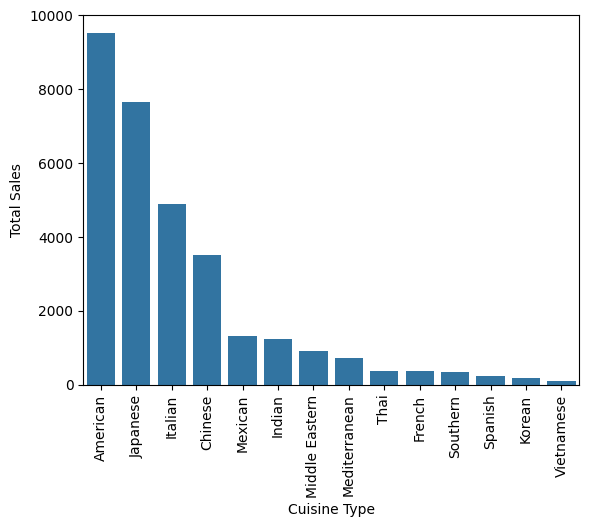

In [ ]:
# Group the data by cuisine type and calculate the sum of order costs
sales_by_cuisine = df.groupby("cuisine_type")["cost_of_the_order"].sum().reset_index()

# Sort the data by sales in descending order
sales_by_cuisine = sales_by_cuisine.sort_values(by="cost_of_the_order", ascending=False)

# Create a bar chart of sales by cuisine type
sns.barplot(x="cuisine_type", y="cost_of_the_order", data=sales_by_cuisine)
plt.xlabel("Cuisine Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

This bar chart shows the total sales for each cuisine type.

The chart shows that American cuisine has the highest sales.
This information could be used to plan menu items or to target specific customer segments.

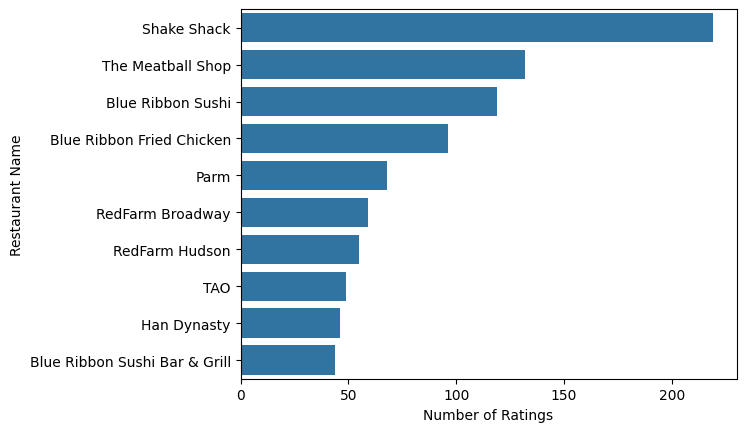

In [ ]:
sns.barplot(x="count", y="restaurant_name", data=ratings_by_restaurant.head(10))
plt.xlabel("Number of Ratings")
plt.ylabel("Restaurant Name")
plt.show()

This shows the top 10 restaurants with the most ratings

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Filter restaurants with rating count greater than 50 and average rating greater than 4
qualified_restaurants = df.groupby("restaurant_name").agg(
    rating_count=("rating", "count"),
    average_rating=("rating", "mean"),
)
qualified_restaurants = qualified_restaurants[
    (qualified_restaurants["rating_count"] > 50) & (qualified_restaurants["average_rating"] > 4)
]

print(qualified_restaurants)

                           rating_count  \
restaurant_name                           
Blue Ribbon Fried Chicken            64   
Blue Ribbon Sushi                    73   
Shake Shack                         133   
The Meatball Shop                    84   

                                                              average_rating  
restaurant_name                                                               
Blue Ribbon Fried Chicken  5552274147571180791946105747014138735908490420...  
Blue Ribbon Sushi          6089773212786788433688123399014801621696704274...  
Shake Shack                4177018310861161655760709332265111926120530120...  
The Meatball Shop          6494697088756469009504678318529911878052948655...  


#### Observations:
The restaurants that fit the criteria are **Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop.**

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
def calculate_net_revenue(df):
    net_revenue = 0
    for index, row in df.iterrows():
        order_cost = row["cost_of_the_order"]
        if order_cost > 20:
            commission = 0.25 * order_cost
        elif order_cost > 5:
            commission = 0.15 * order_cost
        else:
            commission = 0
        net_revenue += commission
def calculate_net_revenue(df):
    # ...
    return net_revenue

net_revenue = calculate_net_revenue(df)
print(f"Net revenue: {net_revenue:.2f}")

Net revenue: 3865.57


#### Observations:
The net revenue generated by the company is  $3865.57 across all orders.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
total_orders = len(df)
long_delivery_orders = df[df["food_preparation_time"] + df["delivery_time"] > 60]
percentage_long_delivery = (len(long_delivery_orders) / total_orders) * 100

print(f"{percentage_long_delivery:.2f}%")

10.24%


#### Observations:
10.24% of orders take more than 60 minutes to get delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
grouped_df = df.groupby("day_of_the_week")["delivery_time"].mean()

print(grouped_df)

print(grouped_df["Weekday"] - grouped_df["Weekend"])

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64
5.870014357297798


#### Observations:

The mean delivery time of the orders on weekdays and weekends vary by **5.87 units of time**. The weekdays delivery time is longer than weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
American cuisines had the most orders on FoodHub so it is the most popular choice, followed by Japanese.

The current feedback ratings can only be interpreted because there are many ratings that were not given. However, most orders were willing to provide Shake Shack with ratings.

There are a handful of recurring customers.

The most sold items are priced around 10 to 15 cost units. (Unclear of what the cost unit is)

### Recommendations:

* FoodHub could feature Shake Shack more to bring in more customers

* FoodHub can provide incentives for customers when they provide ratings as there are too many "Not Given" ratings.

* The recurring customers orders can be studied and also be a niche area to try and figure out customer order patterns.

* FoodHub can release information to most stores of the most sold items price to be 10 - 15 cost units as it can benefit as a win-win-win situation for the platform, customers and restaurants.

---